## Mental Health Treatment Prediction

**Problem Statement** : A drastic thing happened and XYZ Technical Solutions have lost one of their important employees. The company is now very concerned about the health of their employees and would want you to find that set of employees who are in need or may be in need of treatment, taking into account multiple attributes that are already stored in the database. So buckle up, the wellness of your employees is in your hand.

The goal is to help the organization to better understand the factors that contribute to employee health and wellbeing. By developing accurate predictive models, participants can help multiple organizations to identify areas where interventions may be needed, and to design targeted wellness programs that can improve employee health and productivity. The objective is to predict if the employee needs treatment, from the given features of the Test data.

In [2]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To conver|t the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
#Loading the datasets
train = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\test.csv")
sample = pd.read_csv(r"C:\Users\User\Desktop\Hackathon\sample.csv")

In [6]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
train.shape

(1048, 28)

In [8]:
test.shape

(210, 27)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [10]:
train.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [11]:
test.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       3
care_options                   0
wellness_program               2
seek_help                      0
anonymity                      0
leave                          5
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

In [66]:
train.state.unique()     #since state won't be  necessary for our problem statement we'll drop this column

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [12]:
test.state.unique()

array([nan, 'WA', 'IL', 'FL', 'TN', 'CA', 'OR', 'NJ', 'UT', 'PA', 'IN',
       'OH', 'VA', 'TX', 'AL', 'WI', 'NY', 'SC', 'MN', 'VT', 'MI', 'NC',
       'OK', 'MD'], dtype=object)

In [67]:
train.work_interfere.unique()        #change nan to never

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [14]:
test.work_interfere.unique()   

array(['Sometimes', 'Often', 'Never', 'Rarely', nan], dtype=object)

In [68]:
train.benefits.unique()     #change nan to don't know 

array(['Yes', "Don't know", 'No', nan], dtype=object)

In [15]:
test.benefits.unique()  

array(['No', 'Yes', "Don't know", nan], dtype=object)

In [69]:
train.drop(columns=['state', 'Timestamp'], inplace=True)

In [16]:
test.drop(columns=['state', 'Timestamp'], inplace=True)

Cleaning Age Column

In [70]:
train.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8])

In [71]:
# Step 1: Remove negative sign
train['Age'] = train['Age'].abs()

In [72]:
# Step 2: Compute average of valid ages (<= 100)
valid_mean = train.loc[train['Age'] <= 100, 'Age'].mean()

# Step 3: Replace ages > 100 with the mean
train.loc[train['Age'] > 100, 'Age'] = valid_mean

# Step 4: Round up to the next whole number
train['Age'] = np.ceil(train['Age']).astype(int)


print(train['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8]


In [160]:
# Binning Age
train['Age_bin'] = pd.cut(train['Age'], bins=[0, 24, 34, 44, 100], labels=['<25', '25-34', '35-44', '45+'])

In [161]:
train['Age_bin'].unique()

['35-44', '25-34', '<25', '45+']
Categories (4, object): ['<25' < '25-34' < '35-44' < '45+']

Cleaning Gender

In [17]:
# Step 1: Remove negative sign
test['Age'] = test['Age'].abs()

# Step 2: Compute average of valid ages (<= 100)
valid_mean = test.loc[test['Age'] <= 100, 'Age'].mean()

# Step 3: Replace ages > 100 with the mean
test.loc[test['Age'] > 100, 'Age'] = valid_mean

# Step 4: Round up to the next whole number
test['Age'] = np.ceil(test['Age']).astype(int)


print(test['Age'].unique())


[39 26 23 35 36 42 27 33 31 28 29 44 25 24 34 48 43 41 40 37 32 30 38 11
 45 50 46 20  1 21 51 72 56 60 22]


In [18]:
# Binning Age
test['Age_bin'] = pd.cut(test['Age'], bins=[0, 24, 34, 44, 100], labels=['<25', '25-34', '35-44', '45+'])

In [19]:
test['Age_bin'].unique()

['35-44', '25-34', '<25', '45+']
Categories (4, object): ['<25' < '25-34' < '35-44' < '45+']

In [73]:
train.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

In [20]:
test.Gender.unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f'],
      dtype=object)

In [21]:
# Define mappings
male_terms = ['Male', 'M', 'male', 'Male ', 'm','Cis Man']

female_terms = ['female', 'Female','F',
       'Woman', 'femail','f']

# Function to map gender values
def normalize_gender(val):
    if val in male_terms:
        return "Male"
    elif val in female_terms:
        return "Female"
    else:
        return "Queer"

# Apply transformation
test['Gender'] = test['Gender'].apply(normalize_gender)

# Check unique values after cleaning
print(test['Gender'].unique())


['Male' 'Female' 'Queer']


In [74]:
# Define mappings
male_terms = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile',
              'something kinda male?', 'Mal', 'Male (CIS)',
              'Guy (-ish) ^_^', 'Cis Male', 'Make', 'Male ',
              'Man', 'msle', 'Mail', 'cis male', 'Malr']

female_terms = ['Female', 'f', 'F', 'Cis', 'female', 'Woman',
                'Femake', 'woman', 'cis-female/femme',
                'Female (cis)']

# Function to map gender values
def normalize_gender(val):
    if val in male_terms:
        return "Male"
    elif val in female_terms:
        return "Female"
    else:
        return "Queer"

# Apply transformation
train['Gender'] = train['Gender'].apply(normalize_gender)

# Check unique values after cleaning
print(train['Gender'].unique())


['Female' 'Male' 'Queer']


In [162]:
train['Gender'] = train['Gender'].map({'Male':0, 'Female':1, 'Queer':2})

In [22]:
test['Gender'] = test['Gender'].map({'Male':0, 'Female':1, 'Queer':2})

In [163]:
train['Gender'].unique()

array([1, 0, 2])

In [23]:
test['Gender'].unique()

array([0, 1, 2])

In [ ]:
Cleaning Country

In [28]:
train.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The'], dtype=object)

In [29]:
test.Country.unique()

array(['United Kingdom', 'United States', 'Switzerland', 'Canada',
       'Germany', 'South Africa', 'Greece', 'Netherlands', 'France',
       'Australia', 'India', 'Croatia', 'New Zealand', 'Moldova',
       'Sweden', 'Belgium', 'Israel', 'Singapore', 'Poland', 'Colombia',
       'Georgia', 'China', 'Bulgaria', 'Italy', 'Ireland', 'Brazil',
       'Czech Republic', 'Philippines', 'Finland'], dtype=object)

In [30]:
train.Country.replace({"Bahamas, The":"Bahamas"},inplace = True)

In [31]:
train.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark', 'Bahamas'],
      dtype=object)

In [32]:
# Define mapping
country_to_region = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Costa Rica': 'North America',
    'Bahamas': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Colombia': 'South America',
    
    # Europe
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Portugal': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Germany': 'Europe',
    'Russia': 'Europe',
    'Slovenia': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Sweden': 'Europe',
    'Latvia': 'Europe',
    'Romania': 'Europe',
    'Belgium': 'Europe',
    'Spain': 'Europe',
    'Finland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Hungary': 'Europe',
    'Croatia': 'Europe',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    
    # Asia
    'India': 'Asia',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Japan': 'Asia',
    'Thailand': 'Asia',
    
    # Africa
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Zimbabwe': 'Africa'
}


In [33]:
# Map countries to regions
train['Region'] = train['Country'].map(country_to_region)

# Handle unmapped values (if any)
train['Region'] = train['Region'].fillna('Other')


In [41]:
# Define mapping
country_to_region = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Costa Rica': 'North America',
    'Bahamas': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Colombia': 'South America',
    
    # Europe
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Portugal': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Germany': 'Europe',
    'Russia': 'Europe',
    'Slovenia': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Sweden': 'Europe',
    'Latvia': 'Europe',
    'Romania': 'Europe',
    'Belgium': 'Europe',
    'Spain': 'Europe',
    'Finland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Hungary': 'Europe',
    'Croatia': 'Europe',
    'Norway': 'Europe',
    'Denmark': 'Europe',
      # Sometimes considered Eurasia, but usually grouped with Europe in datasets
    
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    
    # Asia
    'India': 'Asia',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Japan': 'Asia',
    'Thailand': 'Asia',
    
    
    # Africa
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Zimbabwe': 'Africa'
}



In [42]:
# Map countries to regions
test['Region'] = test['Country'].map(country_to_region)

# Handle unmapped values (if any)
test['Region'] = test['Region'].fillna('Other')

In [35]:
# Option 1: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Region'] = le.fit_transform(train['Region'])

# Option 2: One-Hot Encoding
train = pd.get_dummies(train, columns=['Region'], drop_first=True)


In [44]:
# Option 1: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Region'] = le.fit_transform(test['Region'])

# Option 2: One-Hot Encoding
test = pd.get_dummies(test, columns=['Region'], drop_first=True)

In [191]:
# Group countries with <50 counts into "Other"
country_counts = train['Country'].value_counts()
train['Country_clean'] = train['Country'].apply(lambda x: x if country_counts[x] > 50 else "Other")

In [45]:
# Group countries with <50 counts into "Other"
country_counts = test['Country'].value_counts()
test['Country_clean'] = test['Country'].apply(lambda x: x if country_counts[x] > 50 else "Other")

Cleaning self_employed

In [46]:
test.self_employed.value_counts()

self_employed
No     189
Yes     21
Name: count, dtype: int64

In [81]:
train.self_employed.value_counts()

self_employed
No     906
Yes    124
Name: count, dtype: int64

In [49]:
train['self_employed'].fillna("No", inplace=True)

In [47]:
test['self_employed'].fillna("No", inplace=True)

In [50]:
train.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [51]:
test.self_employed.unique()

array(['Yes', 'No'], dtype=object)

In [52]:
#Cleaning Family history
train['family_history'] = train['family_history'].map({'Yes':1, 'No':0})

In [53]:
test['family_history'] = test['family_history'].map({'Yes':1, 'No':0})

Cleaning work_interfere

In [54]:
train.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [55]:
test.work_interfere.unique()

array(['Sometimes', 'Often', 'Never', 'Rarely', nan], dtype=object)

In [57]:
train['work_interfere'].fillna("Never",inplace = True)

In [58]:
test['work_interfere'].fillna("Never",inplace = True)

In [59]:
work_interfere_map = {'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}
train['work_interfere'] = train['work_interfere'].map(work_interfere_map)

In [60]:
work_interfere_map = {'Never':0, 'Rarely':1, 'Sometimes':2, 'Often':3}
test['work_interfere'] = test['work_interfere'].map(work_interfere_map)

Cleaning Number of Employees

In [61]:
train.no_employees.value_counts()

no_employees
25-Jun            245
26-100            238
More than 1000    227
100-500           150
5-Jan             133
500-1000           55
Name: count, dtype: int64

In [62]:
test.no_employees.value_counts()

no_employees
More than 1000    55
26-100            51
25-Jun            45
5-Jan             28
100-500           26
500-1000           5
Name: count, dtype: int64

In [167]:
no_emp_map = {
    '1-5':0, '6-25':1, '26-100':2, '100-500':3, '500-1000':4, '1000+':5
}
train['no_employees'] = train['no_employees'].map(no_emp_map)


In [63]:
no_emp_map = {
    '1-5':0, '6-25':1, '26-100':2, '100-500':3, '500-1000':4, '1000+':5
}
test['no_employees'] = test['no_employees'].map(no_emp_map)


In [64]:
# Cleaning remote_work / tech_company
train['remote_work'] = train['remote_work'].map({'Yes':1, 'No':0})
train['tech_company'] = train['tech_company'].map({'Yes':1, 'No':0})

In [65]:
# Cleaning remote_work / tech_company
test['remote_work'] = test['remote_work'].map({'Yes':1, 'No':0})
test['tech_company'] = test['tech_company'].map({'Yes':1, 'No':0})

Cleaning benefits

In [104]:
train.benefits.unique()

array(['Yes', "Don't know", 'No', nan], dtype=object)

In [66]:
test.benefits.unique()

array(['No', 'Yes', "Don't know", nan], dtype=object)

In [67]:
train.benefits.value_counts()

benefits
Yes           400
Don't know    329
No            306
Name: count, dtype: int64

In [68]:
test.benefits.value_counts()

benefits
Yes           77
No            67
Don't know    63
Name: count, dtype: int64

In [71]:
train['benefits'].fillna("Don't know", inplace=True)
test['benefits'].fillna("Don't know", inplace=True)

In [72]:
test.benefits.unique()

array(['No', 'Yes', "Don't know"], dtype=object)

In [107]:
train.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

Cleaning wellness_program

In [111]:
train.wellness_program.unique()

array(['No', "Don't know", 'Yes', nan], dtype=object)

In [73]:
test.wellness_program.unique()

array(['Yes', 'No', "Don't know", nan], dtype=object)

In [75]:
train['wellness_program'].fillna("Don't know", inplace=True)
test['wellness_program'].fillna("Don't know", inplace=True)

In [169]:
# benefits, care_options, wellness_program, seek_help, anonymity
yn_map = {'Yes':2, 'Don’t know':1, 'No':0}
for col in ['benefits','care_options','wellness_program','seek_help','anonymity']:
    train[col] = train[col].map(yn_map)

In [76]:
# benefits, care_options, wellness_program, seek_help, anonymity
yn_map = {'Yes':2, 'Don’t know':1, 'No':0}
for col in ['benefits','care_options','wellness_program','seek_help','anonymity']:
    test[col] = test[col].map(yn_map)

Cleaning leave

In [116]:
train.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy', nan], dtype=object)

In [77]:
test.leave.unique()

array(['Somewhat difficult', "Don't know", 'Very easy', 'Somewhat easy',
       'Very difficult', nan], dtype=object)

In [78]:
train['leave'].fillna("Don't know", inplace=True)
test['leave'].fillna("Don't know", inplace=True)

In [79]:
train.leave.replace({"Somewhat easy":"Easy",'Somewhat difficult':'Difficult'},inplace = True)
test.leave.replace({"Somewhat easy":"Easy",'Somewhat difficult':'Difficult'},inplace = True)

In [170]:
leave_map = {
    'Very difficult':0, 'difficult':1,
    'Don’t know':2, 'easy':3, 'Very easy':4
}
train['leave'] = train['leave'].map(leave_map)


In [80]:
leave_map = {
    'Very difficult':0, 'difficult':1,
    'Don’t know':2, 'easy':3, 'Very easy':4
}
test['leave'] = test['leave'].map(leave_map)

In [171]:
# Cleaning mental_health_consequence / phys_health_consequence
consequence_map = {'No':0, 'Maybe':1, 'Yes':2}
train['mental_health_consequence'] = train['mental_health_consequence'].map(consequence_map)
train['phys_health_consequence'] = train['phys_health_consequence'].map(consequence_map)

In [81]:
# Cleaning mental_health_consequence / phys_health_consequence
consequence_map = {'No':0, 'Maybe':1, 'Yes':2}
test['mental_health_consequence'] = test['mental_health_consequence'].map(consequence_map)
test['phys_health_consequence'] = test['phys_health_consequence'].map(consequence_map)

In [83]:
# Cleaning coworkers / supervisor
support_map = {'No':0, 'Some of them':1, 'Yes':2}
train['coworkers'] = train['coworkers'].map(support_map)
train['supervisor'] = train['supervisor'].map(support_map)

In [84]:
# Cleaning coworkers / supervisor
support_map = {'No':0, 'Some of them':1, 'Yes':2}
test['coworkers'] = test['coworkers'].map(support_map)
test['supervisor'] = test['supervisor'].map(support_map)

In [85]:
# mental_health_interview / phys_health_interview
train['mental_health_interview'] = train['mental_health_interview'].map(consequence_map)
train['phys_health_interview'] = train['phys_health_interview'].map(consequence_map)

In [86]:
# mental_health_interview / phys_health_interview
test['mental_health_interview'] = test['mental_health_interview'].map(consequence_map)
test['phys_health_interview'] = test['phys_health_interview'].map(consequence_map)

In [87]:
# mental_vs_physical
train['mental_vs_physical'] = train['mental_vs_physical'].map(yn_map)
test['mental_vs_physical'] = test['mental_vs_physical'].map(yn_map)


In [88]:
# obs_consequence
train['obs_consequence'] = train['obs_consequence'].map({'Yes':1, 'No':0})
test['obs_consequence'] = test['obs_consequence'].map({'Yes':1, 'No':0})

Cleaning the Comments 

In [131]:
train[train.comments.isnull()]

,S.No,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,37,Female,United States,No,No,Yes,Often,25-Jun,No,...,Easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,44,Male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,32,Male,Canada,No,No,No,Rarely,25-Jun,No,...,Difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,Difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,31,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1043,40,Male,United States,No,Yes,Yes,Sometimes,More than 1000,Yes,...,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,NaN
1043,1044,26,Male,United States,No,No,Yes,Sometimes,25-Jun,No,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,29,Female,United Kingdom,No,No,Yes,Often,More than 1000,No,...,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,26,Female,Canada,No,Yes,Yes,Sometimes,100-500,No,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN


In [89]:
#Since we have 916 records with nan values, we will drop the column
train.drop(columns= 'comments', inplace=True)
test.drop(columns= 'comments', inplace=True)

### Encoding the target variable

In [176]:
train['treatment'] = train['treatment'].map({'Yes':1, 'No':0})

### Check for Duplicate values

In [134]:
train[train.duplicated()]

,S.No,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [90]:
test[test.duplicated()]

,S.No,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,mental_vs_physical,obs_consequence,Age_bin,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Country_clean


### Checking the Missing values

In [135]:
train.isnull().sum()

S.No                         0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [91]:
test.isnull().sum()

S.No                           0
Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
work_interfere                 0
no_employees                 128
remote_work                    0
tech_company                   0
benefits                      66
care_options                  51
wellness_program              25
seek_help                     54
anonymity                    134
leave                        164
mental_health_consequence      0
phys_health_consequence        0
coworkers                    210
supervisor                   210
mental_health_interview        0
phys_health_interview          0
mental_vs_physical           105
obs_consequence                0
Age_bin                        0
Region_1                       0
Region_2                       0
Region_3                       0
Region_4                       0
Region_5                       0
Region_6  

# Data Pre-processing

## Exploratory Data Analysis (EDA)

UNIVARIANT ANALYSIS

<Axes: xlabel='Age', ylabel='Count'>

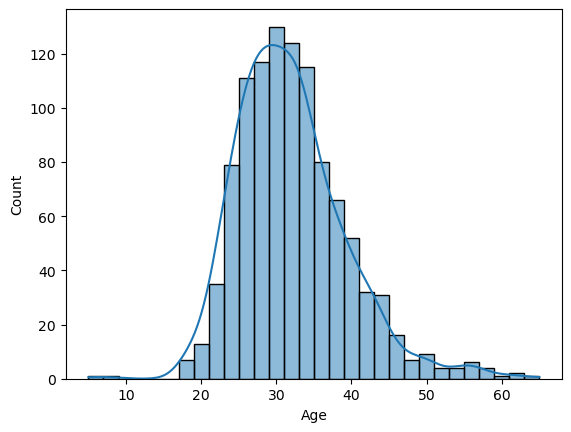

In [136]:
#Age Distribution
sns.histplot(train['Age'], bins=30, kde=True)

<Axes: xlabel='count', ylabel='Gender'>

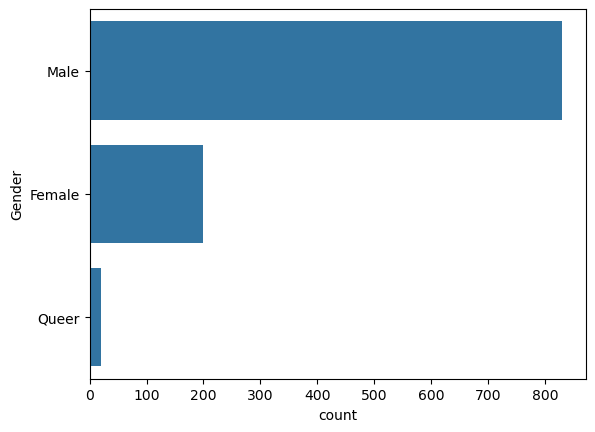

In [137]:
#Gender Distribution
sns.countplot(y=train['Gender'], order=train['Gender'].value_counts().index)

<Axes: xlabel='Country'>

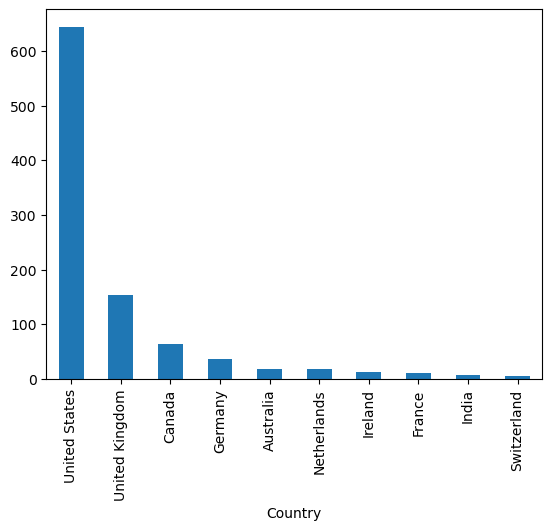

In [138]:
# 3. Country Frequency (Top 10)
train['Country'].value_counts().head(10).plot(kind='bar')

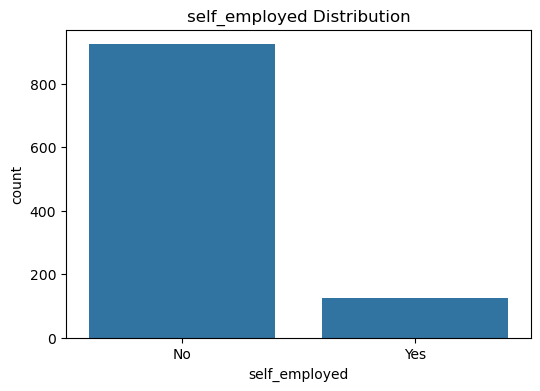

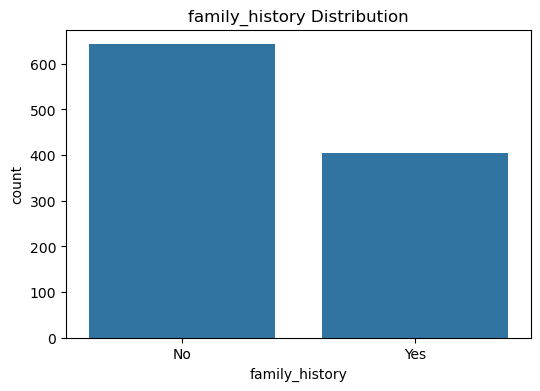

In [157]:
# 4. Binary Features Distribution
binary_cols = ['self_employed', 'family_history']
for col in binary_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=train[col])
    plt.title(f"{col} Distribution")
    plt.show()

### Bivariate Analysis

<Axes: xlabel='treatment', ylabel='Age'>

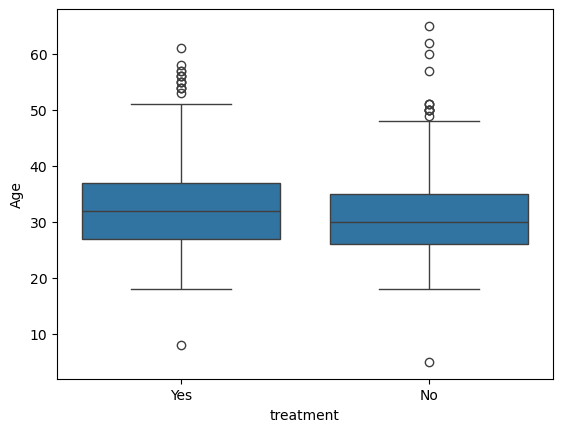

In [142]:
# Age vs Treatment
sns.boxplot(x=train['treatment'], y=train['Age'])


Insights:
- Outliers Show Reluctance in Older Age Groups, Employees above 50 years are mostly seen in the “No” (not seeking treatment) group, suggesting that older employees might be less likely to opt for treatment, possibly due to stigma or different attitudes towards mental health.
- The “Yes” (treatment) group shows a slightly higher concentration in younger employees (20s–30s), indicating that younger employees may be more open to seeking mental health treatment compared to older employees.

<Axes: xlabel='Gender', ylabel='count'>

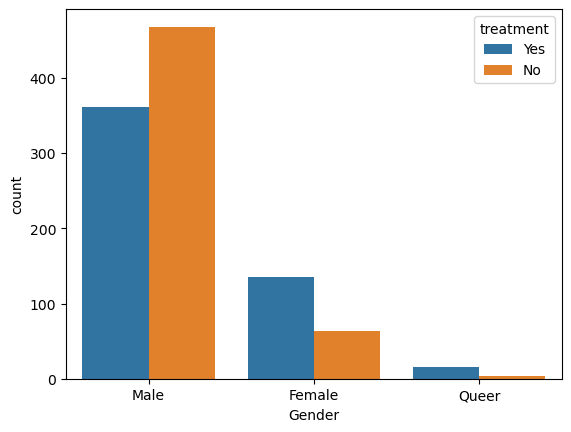

In [145]:
# Gender vs Treatment
sns.countplot(x='Gender', hue='treatment', data=train,
              order=train['Gender'].value_counts().index)

<Axes: xlabel='family_history', ylabel='count'>

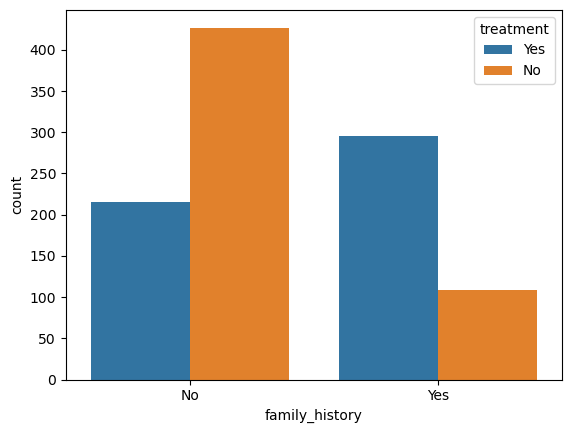

In [147]:
# 3. Family History vs Treatment
sns.countplot(x='family_history', hue='treatment', data=train)

<Axes: xlabel='work_interfere', ylabel='count'>

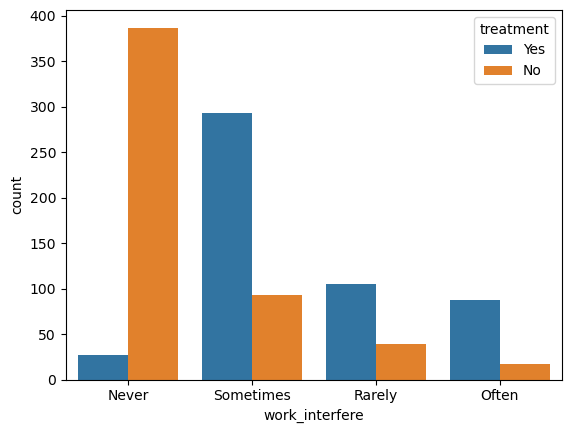

In [149]:
# 4. Work Interference vs Treatment
sns.countplot(x='work_interfere', hue='treatment', data=train,
              order=train['work_interfere'].value_counts().index)

<Axes: xlabel='leave', ylabel='count'>

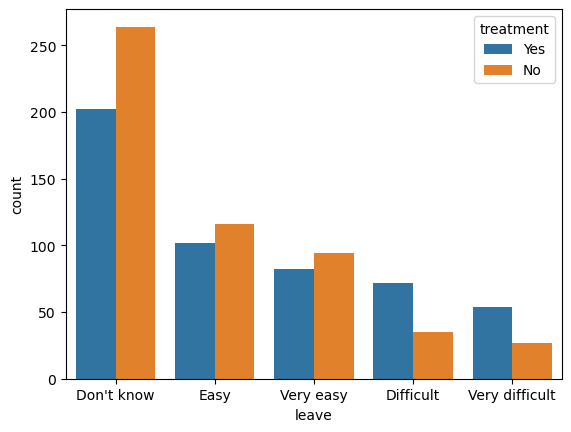

In [151]:
# 5. Leave Policy vs Treatment
sns.countplot(x='leave', hue='treatment', data=train,
              order=train['leave'].value_counts().index)

### Multivariate Analysis

<Axes: xlabel='work_interfere,family_history'>

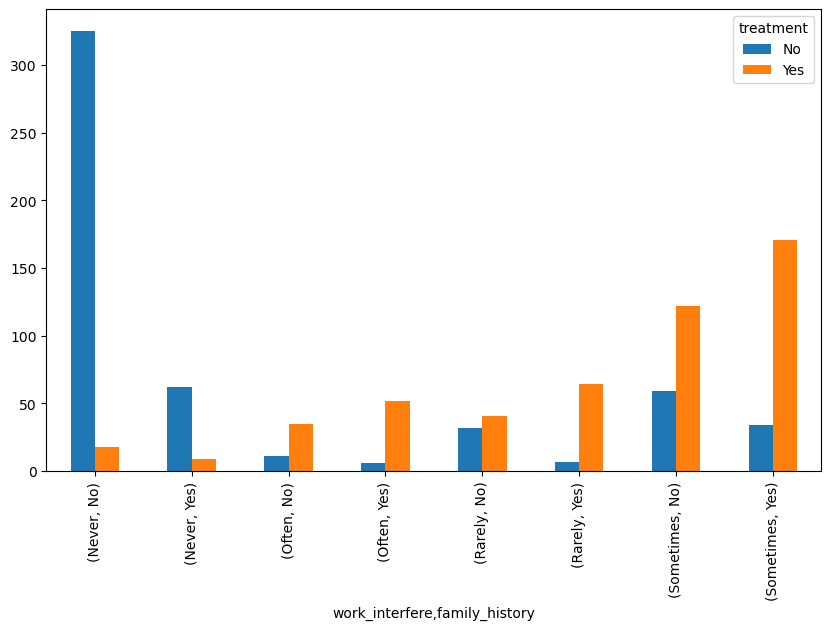

In [152]:
# 1. Work Interference × Family History vs Treatment
pd.crosstab([train['work_interfere'], train['family_history']], train['treatment']).plot(kind='bar', figsize=(10,6))

<Axes: xlabel='supervisor,coworkers'>

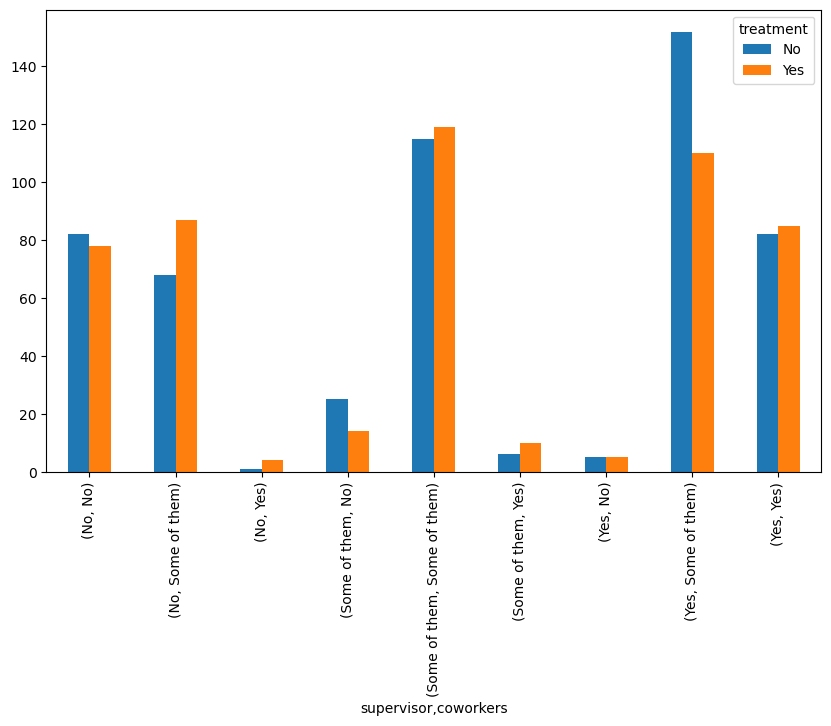

In [154]:
# 2. Supervisor Support × Coworkers Support vs Treatment
pd.crosstab([train['supervisor'], train['coworkers']], train['treatment']).plot(kind='bar', figsize=(10,6))


<Axes: xlabel='leave,mental_health_consequence'>

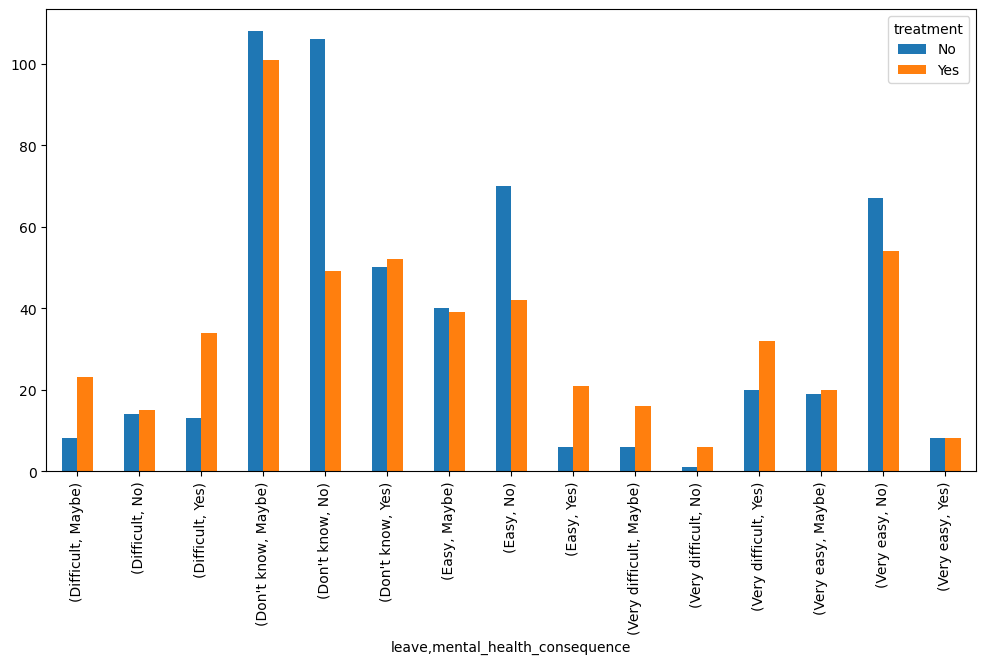

In [155]:
# 3. Leave × Mental Health Consequence vs Treatment
pd.crosstab([train['leave'], train['mental_health_consequence']], train['treatment']).plot(kind='bar', figsize=(12,6))

<Axes: xlabel='tech_company,remote_work'>

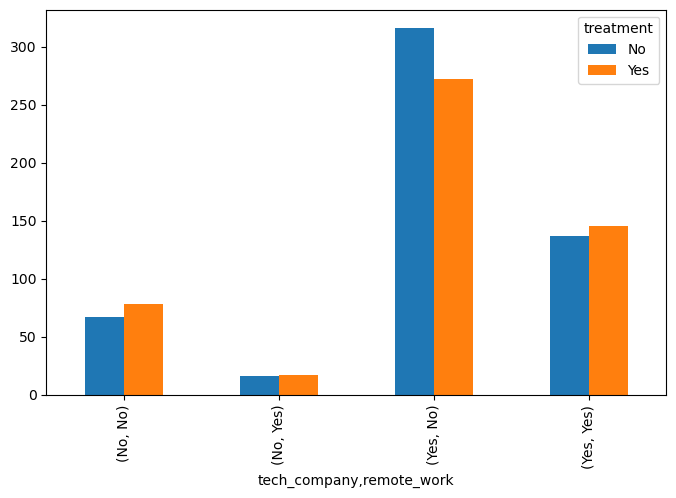

In [156]:
# 5. Tech Company × Remote Work vs Treatment
pd.crosstab([train['tech_company'], train['remote_work']], train['treatment']).plot(kind='bar', figsize=(8,5))

## Machine Learning Pipeline

In [177]:
# 1.Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [178]:
# 2. Features & Target Split

X = train.drop('treatment', axis=1)
y = train['treatment']

In [193]:
X = pd.get_dummies(X, drop_first=True) 

In [194]:
#3. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [199]:
# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 5. Baseline Models

In [200]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [201]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [202]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

###  6. Evaluation Function

In [204]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


📊 Logistic Regression Results
Accuracy: 0.8
ROC AUC: 0.7997093287310383

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.79      0.79      0.79       101

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



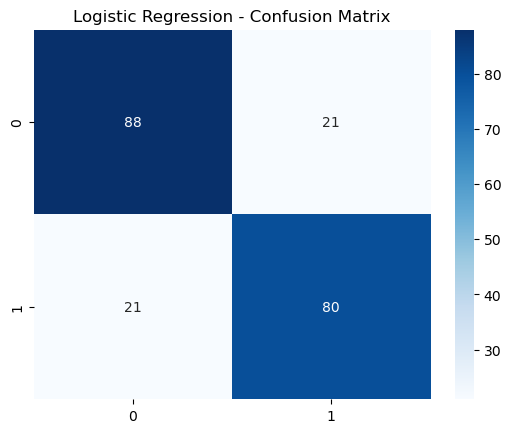


📊 Random Forest Results
Accuracy: 0.8047619047619048
ROC AUC: 0.8057498410391498

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       109
           1       0.78      0.83      0.80       101

    accuracy                           0.80       210
   macro avg       0.81      0.81      0.80       210
weighted avg       0.81      0.80      0.80       210



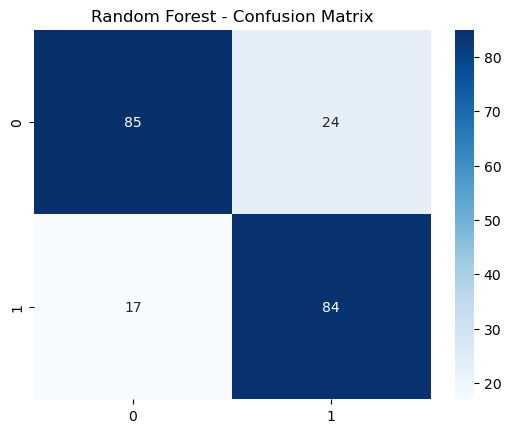


📊 XGBoost Results
Accuracy: 0.8095238095238095
ROC AUC: 0.8096103188300482

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       109
           1       0.80      0.81      0.80       101

    accuracy                           0.81       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.81      0.81      0.81       210



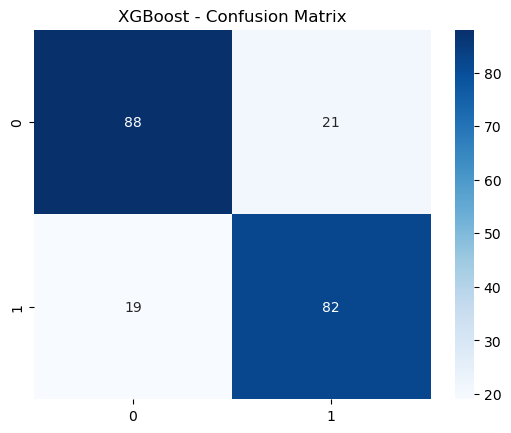

In [206]:
# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

###  7. Cross Validation

In [215]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"✅ {name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

✅ Logistic Regression CV Accuracy: 0.8111 (+/- 0.0213)
✅ Random Forest CV Accuracy: 0.8225 (+/- 0.0191)
✅ XGBoost CV Accuracy: 0.8073 (+/- 0.0192)
